<a href="https://colab.research.google.com/github/cicbeast/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Raul_Harrington_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO
# Let's do our imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# Let's get the data from the archive into our dataframe and take a look
haberman_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
df = pd.read_csv(haberman_data_url)
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [93]:
# This is a similar header issue to one that we've seen
# Let's make sure
df.count()

30     305
64     305
1      305
1.1    305
dtype: int64

In [94]:
# We know from the metadata that there are 306 instances
# But for the sake of certainty
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3103  100  3103    0     0  49253      0 --:--:-- --:--:-- --:--:-- 50048
    306     306    3103


In [95]:
# We'll reset the dataframe to fix the issue
df = pd.read_csv(haberman_data_url, header=None)
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [96]:
# Let's make sure
df.count()

0    306
1    306
2    306
3    306
dtype: int64

In [97]:
# Do we have any missing values
df.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [98]:
# Nope! That's good luck for us
# However, there are no names for the columns
# We can look through the metadata and assign them
col_names = ['age', 'operation-yr', 'pos-nodes', 'surv-status']
df = pd.read_csv(haberman_data_url, header=None, names=col_names)
df.head(10)

,age,operation-yr,pos-nodes,surv-status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [99]:
# Let's take a look at suv-status
df['surv-status'].sample(10)

277    1
70     1
32     1
295    1
109    2
272    1
63     2
164    1
139    1
211    1
Name: surv-status, dtype: int64

In [100]:
# Let's make sure that there are only 2 unique values
df['surv-status'].nunique()

2

In [0]:
# Perfect. Now we want to convert this to a more traditional Boolean
# Let's define a function to turn those 2's to 0's
def surv_changer(status):
  if status == 2:
    return int(0)
  else:
    return int(1)

In [102]:
#Let's apply the function and take a look
df['surv-status'] = df['surv-status'].apply(surv_changer)
df['surv-status'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    0
8    0
9    1
Name: surv-status, dtype: int64

In [103]:
# Excellent! Now let's take a look at our first five rows
df.head()

,age,operation-yr,pos-nodes,surv-status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [104]:
# Now, let's dive into our data
df.describe()

,age,operation-yr,pos-nodes,surv-status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [105]:
# I would like to see age vs survival status data
# First we'll bin the age data
age_bins = pd.cut(df['age'], bins=5)
# Then we'll crosstab 
pd.crosstab(age_bins, df['surv-status'])

surv-status,0,1
age,,
"(29.947, 40.6]",4,39
"(40.6, 51.2]",31,68
"(51.2, 61.8]",27,69
"(61.8, 72.4]",16,43
"(72.4, 83.0]",3,6


In [106]:
# Now let's normalize the data to get the percentages
pd.crosstab(age_bins, df['surv-status'], normalize = 'index')

surv-status,0,1
age,,
"(29.947, 40.6]",0.093023,0.906977
"(40.6, 51.2]",0.313131,0.686869
"(51.2, 61.8]",0.281250,0.718750
"(61.8, 72.4]",0.271186,0.728814
"(72.4, 83.0]",0.333333,0.666667


In [107]:
# Let's also look at pos-nodes vs suv-status
nodes_bins = pd.cut(df['pos-nodes'], bins=5)
pd.crosstab(nodes_bins, df['surv-status'])

surv-status,0,1
pos-nodes,,
"(-0.052, 10.4]",58,208
"(10.4, 20.8]",15,11
"(20.8, 31.2]",6,5
"(31.2, 41.6]",1,0
"(41.6, 52.0]",1,1


In [108]:
# And let's normalize to get the percentages
pd.crosstab(nodes_bins, df['surv-status'], normalize = 'index')

surv-status,0,1
pos-nodes,,
"(-0.052, 10.4]",0.218045,0.781955
"(10.4, 20.8]",0.576923,0.423077
"(20.8, 31.2]",0.545455,0.454545
"(31.2, 41.6]",1.000000,0.000000
"(41.6, 52.0]",0.500000,0.500000


In [109]:
# We'll round it out with Operation year vs survival status
year_bins = pd.cut(df['operation-yr'], bins=5)
pd.crosstab(year_bins, df['surv-status'])

surv-status,0,1
operation-yr,,
"(57.989, 60.2]",25,66
"(60.2, 62.4]",10,39
"(62.4, 64.6]",16,45
"(64.6, 66.8]",19,37
"(66.8, 69.0]",11,38


In [110]:
# And we normalize to get the percentages
pd.crosstab(year_bins, df['surv-status'], normalize = 'index')

surv-status,0,1
operation-yr,,
"(57.989, 60.2]",0.274725,0.725275
"(60.2, 62.4]",0.204082,0.795918
"(62.4, 64.6]",0.262295,0.737705
"(64.6, 66.8]",0.339286,0.660714
"(66.8, 69.0]",0.224490,0.775510


In [111]:
# ...And for the hell of it, age vs (pos-nodes vs surv-status)
pd.crosstab(age_bins, [nodes_bins, df['surv-status']], normalize = 'all')

pos-nodes      (-0.052, 10.4]           (10.4, 20.8]           (20.8, 31.2]  \
surv-status                 0         1            0         1            0   
age                                                                           
(29.947, 40.6]       0.009804  0.114379     0.000000  0.009804     0.003268   
(40.6, 51.2]         0.071895  0.205882     0.019608  0.016340     0.006536   
(51.2, 61.8]         0.062092  0.209150     0.016340  0.006536     0.006536   
(61.8, 72.4]         0.035948  0.130719     0.013072  0.003268     0.003268   
(72.4, 83.0]         0.009804  0.019608     0.000000  0.000000     0.000000   

pos-nodes                (31.2, 41.6] (41.6, 52.0]            
surv-status            1            0            0         1  
age                                                           
(29.947, 40.6]  0.003268     0.000000     0.000000  0.000000  
(40.6, 51.2]    0.000000     0.000000     0.003268  0.000000  
(51.2, 61.8]    0.006536     0.003268     0.000000  0.003268  
(61.8, 72.4]    0.006536     0.000000     0.000000  0.000000  
(72.4, 83.0]    0.000000     0.000000     0.000000  0.000000

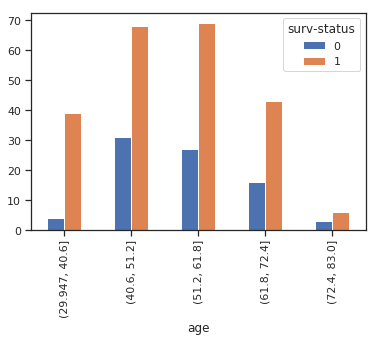

In [112]:
# I think that seeing these crosstabs visually would be helpful
# First, age vs survival status
  age_surv = pd.crosstab(age_bins, df['surv-status'])
  age_surv.plot.bar()

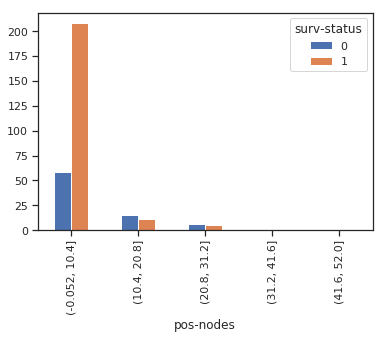

In [113]:
# Second, Positive nodes detected vs Survival status
nodes_surv = pd.crosstab(nodes_bins, df['surv-status'])
nodes_surv.plot.bar()

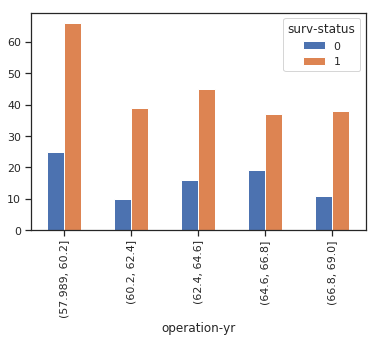

In [114]:
# Third, Operation year vs survival status
year_surv = pd.crosstab(year_bins, df['surv-status'])
year_surv.plot.bar()

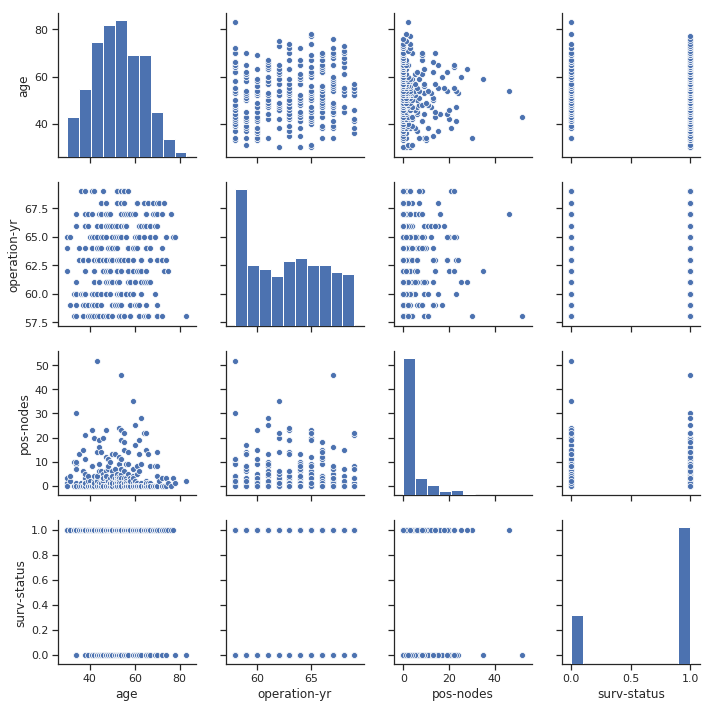

In [115]:
# A pair plot would also let us visualize the raw data
sns.set(style='ticks', color_codes=True)
sns.pairplot(df)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

**Operation year appears to have a positive relationship with survival. As seen in the crosstab above, a consistently higher percentage of patients survived as the operation year progressed. This would make sense as we would assume that the doctors performing the operations would improve with "practice"**
- What is at least one feature that looks to have a negative relationship with survival?

**Positive Nodes Detected appears to have a negative relationship with survival. Once again, the crosstab give us this insite. As more positive nodes were found, a consistently higher percentage of patients did not survive. This makes sense also, as more positive nodes would mean a more aggresive and deadly cancer**
- How are those two features related with each other, and what might that mean?

**From the pairplot above, and the crosstab below, Operation year and Positive nodes detected don't appear to have a relationship. This might mean that the above relationships are spurious in nature **

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

In [116]:
# Let's crosstab operation year and pos-nodes
pd.crosstab(year_bins, nodes_bins.astype(str))

pos-nodes,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
operation-yr,,,,,
"(57.989, 60.2]",80,8,2,0,1
"(60.2, 62.4]",42,3,3,1,0
"(62.4, 64.6]",54,5,2,0,0
"(64.6, 66.8]",46,8,2,0,0
"(66.8, 69.0]",44,2,2,0,1
